In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
fields_dict

{0: {'name': 'CpuTemperature',
  'fields': ['CpuTemperature_vMax',
   'CpuTemperature_vMin',
   'CpuTemperature_vStd',
   'CpuTemperature_value']},
 1: {'name': 'DurationPickToPick',
  'fields': ['DurationPickToPick_vCnt',
   'DurationPickToPick_vFreq',
   'DurationPickToPick_vMax',
   'DurationPickToPick_vMin',
   'DurationPickToPick_vStd',
   'DurationPickToPick_vTrend',
   'DurationPickToPick_value']},
 2: {'name': 'DurationRobotFromFeederToTestBench',
  'fields': ['DurationRobotFromFeederToTestBench_vCnt',
   'DurationRobotFromFeederToTestBench_vFreq',
   'DurationRobotFromFeederToTestBench_vMax',
   'DurationRobotFromFeederToTestBench_vMin',
   'DurationRobotFromFeederToTestBench_vStd',
   'DurationRobotFromFeederToTestBench_vTrend',
   'DurationRobotFromFeederToTestBench_value']},
 3: {'name': 'DurationRobotFromTestBenchToFeeder',
  'fields': ['DurationRobotFromTestBenchToFeeder_vCnt',
   'DurationRobotFromTestBenchToFeeder_vFreq',
   'DurationRobotFromTestBenchToFeeder_vMax',
  

In [3]:
feature_list = [fields_dict[f]['name'] for f in list(fields_dict)[-15:]]
feature_list

['Pressure',
 'ProcessCpuLoadNormalized',
 'ProcessMemoryConsumption',
 'SharpnessImage',
 'SmartMotorPositionError',
 'SmartMotorSpeed',
 'Temperature',
 'TemperatureThermoCam',
 'TotalCpuLoadNormalized',
 'TotalMemoryConsumption',
 'Vacuum',
 'VacuumFusePicked',
 'VacuumValveClosed',
 'ValidFrame',
 'ValidFrameOptrisPIIRCamera']

In [4]:
feature_list_regex= "|".join(["^"+f for f in feature_list])
feature_list_regex

'^Pressure|^ProcessCpuLoadNormalized|^ProcessMemoryConsumption|^SharpnessImage|^SmartMotorPositionError|^SmartMotorSpeed|^Temperature|^TemperatureThermoCam|^TotalCpuLoadNormalized|^TotalMemoryConsumption|^Vacuum|^VacuumFusePicked|^VacuumValveClosed|^ValidFrame|^ValidFrameOptrisPIIRCamera'

In [5]:
# import data
# data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
# train_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [6]:
train_df = data_df_2.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [7]:
train_df

,Pressure_vCnt,Pressure_vFreq,Pressure_vMax,Pressure_vMin,Pressure_vStd,Pressure_vTrend,Pressure_value,ProcessCpuLoadNormalized_vMax,ProcessCpuLoadNormalized_vMin,ProcessCpuLoadNormalized_vStd,...,VacuumValveClosed_vFreq,VacuumValveClosed_vMax,VacuumValveClosed_vMin,VacuumValveClosed_vStd,VacuumValveClosed_vTrend,VacuumValveClosed_value,ValidFrame_vCnt,ValidFrame_vFreq,ValidFrameOptrisPIIRCamera_vCnt,ValidFrameOptrisPIIRCamera_vFreq
0,71,7.085037,2.187567,0.009766,0.655831,0.031979,1.118198,23.406769,1.566678,6.312105,...,0.797749,-0.294900,-0.764153,0.154954,-0.063217,-0.611011,114.0,11.375954,270.0,26.943094
1,98,9.774347,4.602191,2.229072,0.692900,0.024471,3.478861,9.381310,1.545082,2.445169,...,2.389048,-0.268044,-0.777337,0.153182,-0.006087,-0.609363,113.0,11.270440,270.0,26.929322
2,81,8.077200,5.580004,4.624165,0.261282,0.009232,5.156754,17.554947,1.159929,4.013666,...,1.978147,-0.433088,-0.762688,0.100105,-0.003963,-0.655678,113.0,11.268184,270.0,26.923995
3,39,3.882205,5.536058,5.489669,0.012665,-0.001070,5.513083,27.076351,3.916699,7.357576,...,2.587020,-0.313456,-0.771477,0.130930,-0.002894,-0.624444,114.0,11.347981,271.0,26.976342
4,40,3.956296,5.496994,5.477462,0.006556,-0.000431,5.487960,11.313171,4.265234,2.332664,...,2.386986,-0.282205,-0.766594,0.134383,0.002380,-0.634388,114.0,11.275449,272.0,26.902809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,39,3.877850,3.960082,3.940550,0.005155,0.000302,3.950191,11.974115,5.456066,1.770041,...,2.082911,-0.235817,-0.753410,0.169011,-0.011318,-0.574508,114.0,11.335251,271.0,26.946081
17972,39,3.884019,3.964965,3.945433,0.003144,0.000130,3.958454,13.119714,3.124046,3.161912,...,3.287802,-0.266579,-0.814447,0.149156,-0.009829,-0.680935,113.0,11.253684,270.0,26.889352
17973,39,3.868259,3.964965,3.942991,0.004164,0.000030,3.957014,12.117543,6.625257,1.912475,...,3.174571,-0.257302,-0.806635,0.133540,-0.010159,-0.651936,114.0,11.307226,272.0,26.978629
17974,39,3.885589,3.960082,3.510849,0.192944,-0.013834,3.820166,14.249232,6.223158,2.486738,...,0.000000,NaN,NaN,NaN,NaN,NaN,114.0,11.357876,270.0,26.900229


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 77 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pressure_vCnt                     17976 non-null  int64  
 1   Pressure_vFreq                    17976 non-null  float64
 2   Pressure_vMax                     17966 non-null  float64
 3   Pressure_vMin                     17966 non-null  float64
 4   Pressure_vStd                     17966 non-null  float64
 5   Pressure_vTrend                   17965 non-null  float64
 6   Pressure_value                    17966 non-null  float64
 7   ProcessCpuLoadNormalized_vMax     17976 non-null  float64
 8   ProcessCpuLoadNormalized_vMin     17976 non-null  float64
 9   ProcessCpuLoadNormalized_vStd     17976 non-null  float64
 10  ProcessCpuLoadNormalized_value    17976 non-null  float64
 11  ProcessMemoryConsumption_vMax     17976 non-null  float64
 12  Proc

<AxesSubplot:>

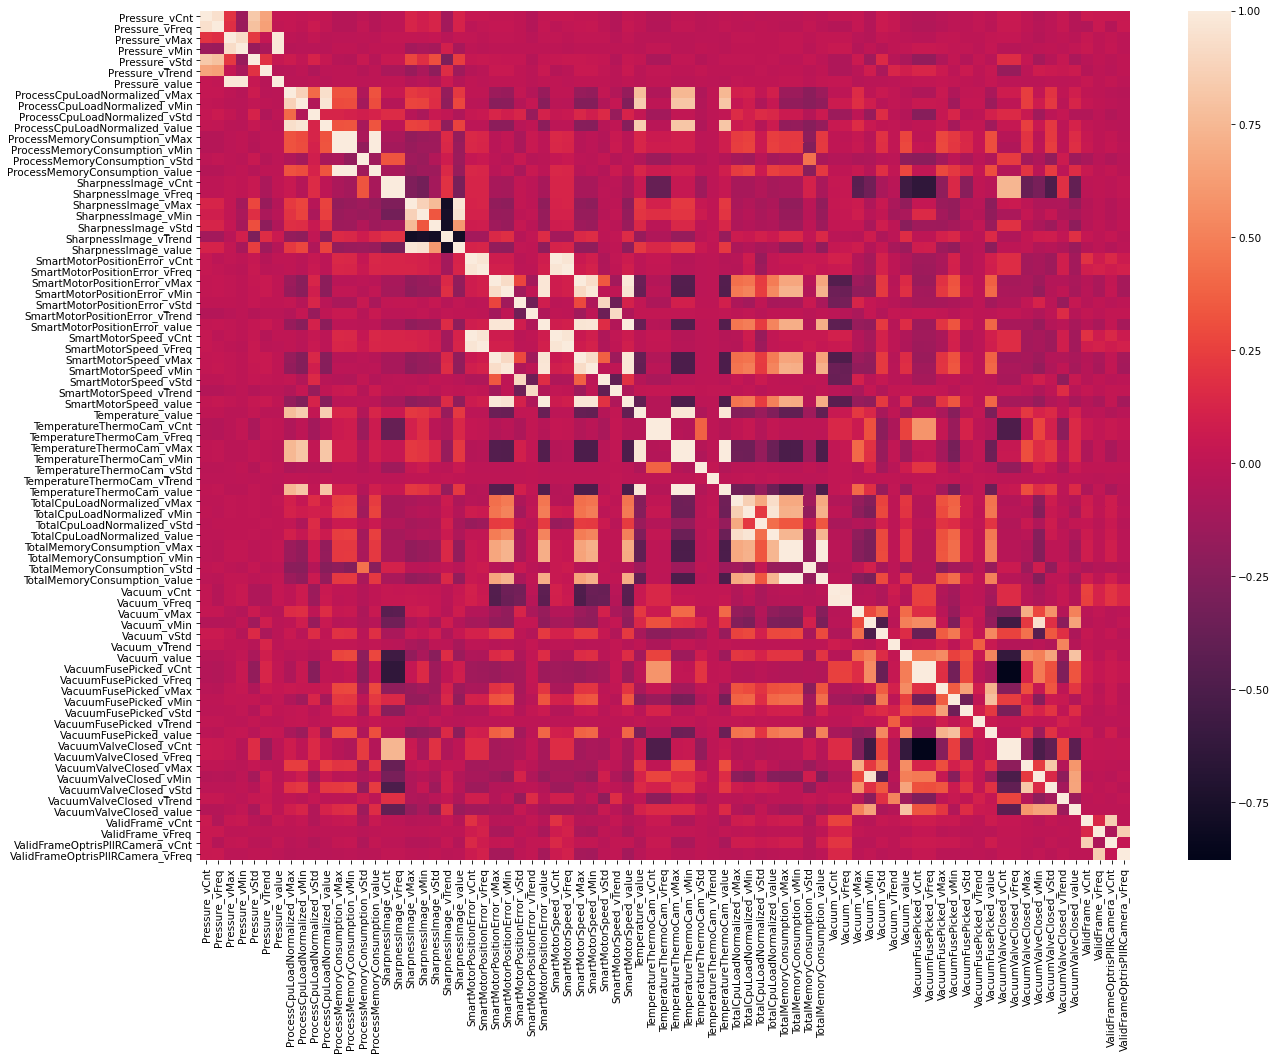

In [9]:
fig = plt.figure(figsize=(20,15), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

In [10]:
list(fields_dictv2)[-15:]

['Pressure',
 'ProcessCpuLoadNormalized',
 'ProcessMemoryConsumption',
 'SharpnessImage',
 'SmartMotorPositionError',
 'SmartMotorSpeed',
 'Temperature',
 'TemperatureThermoCam',
 'TotalCpuLoadNormalized',
 'TotalMemoryConsumption',
 'Vacuum',
 'VacuumFusePicked',
 'VacuumValveClosed',
 'ValidFrame',
 'ValidFrameOptrisPIIRCamera']

In [11]:
color_list = ['']

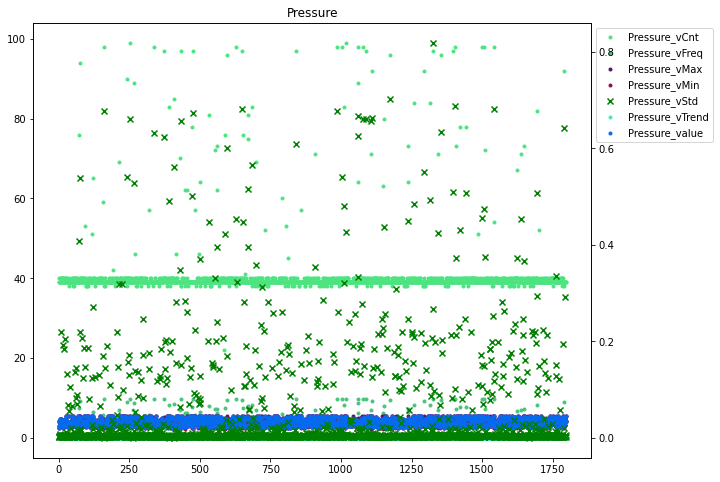

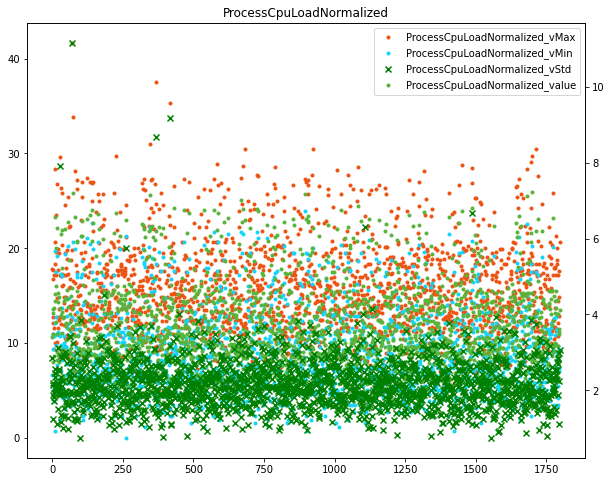

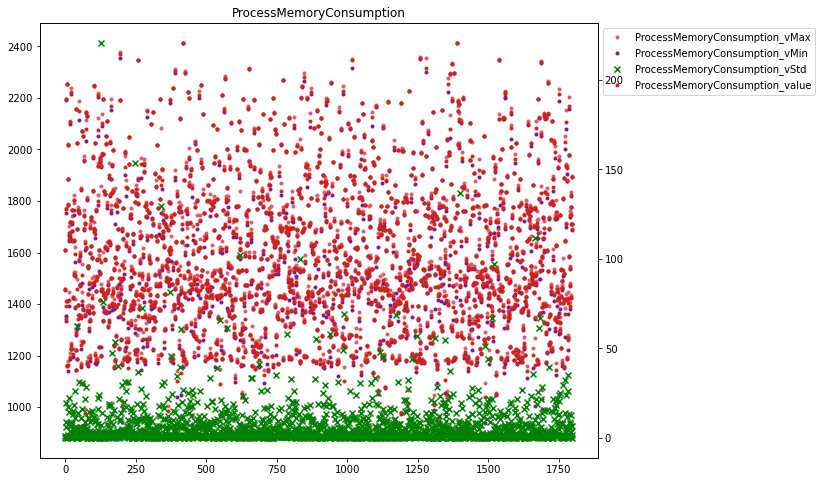

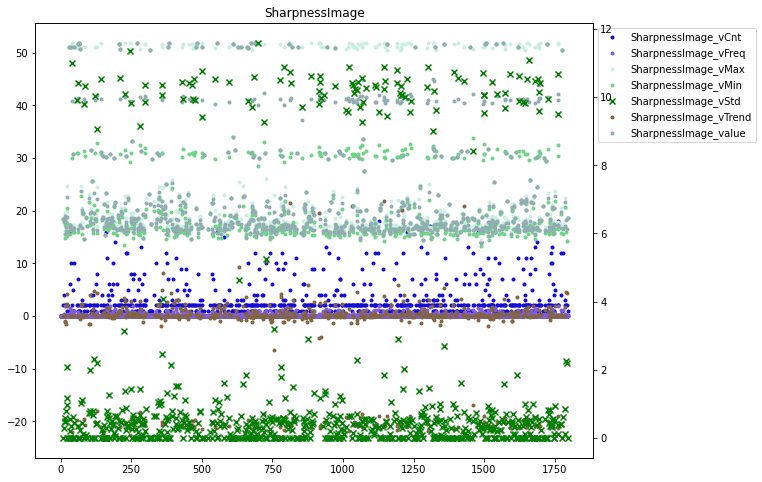

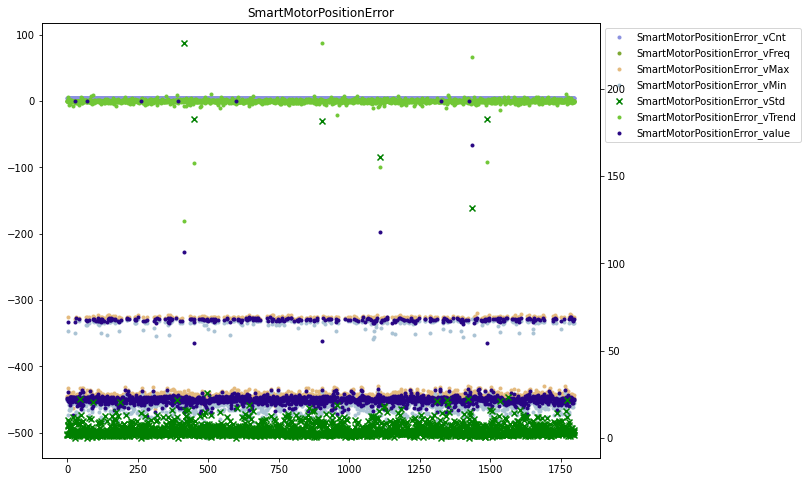

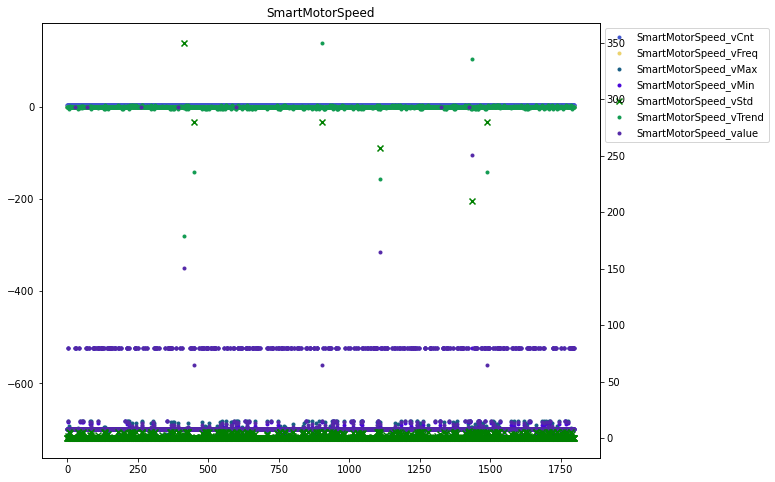

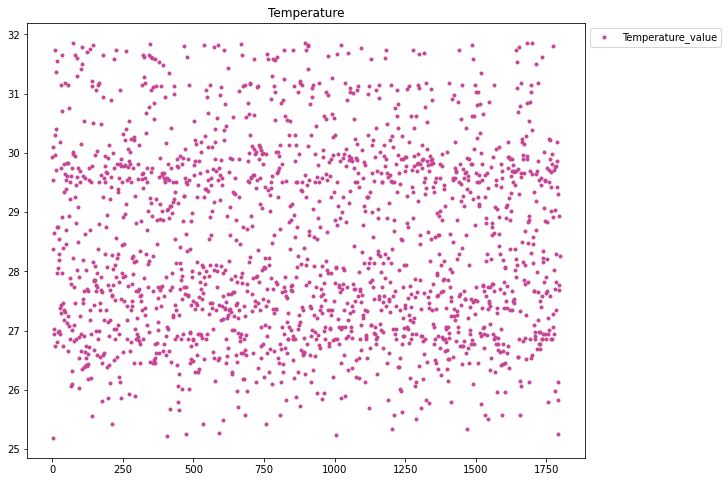

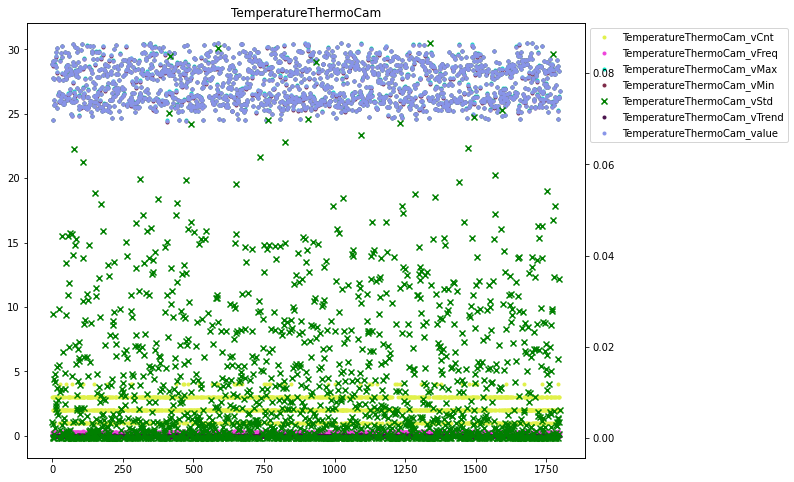

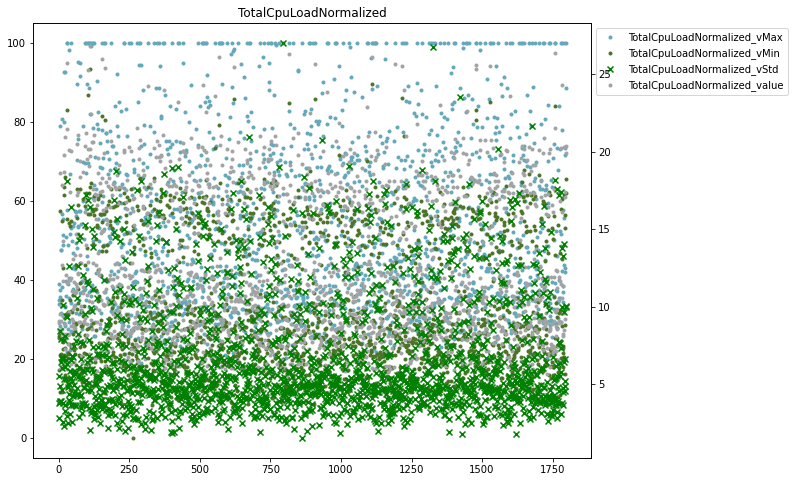

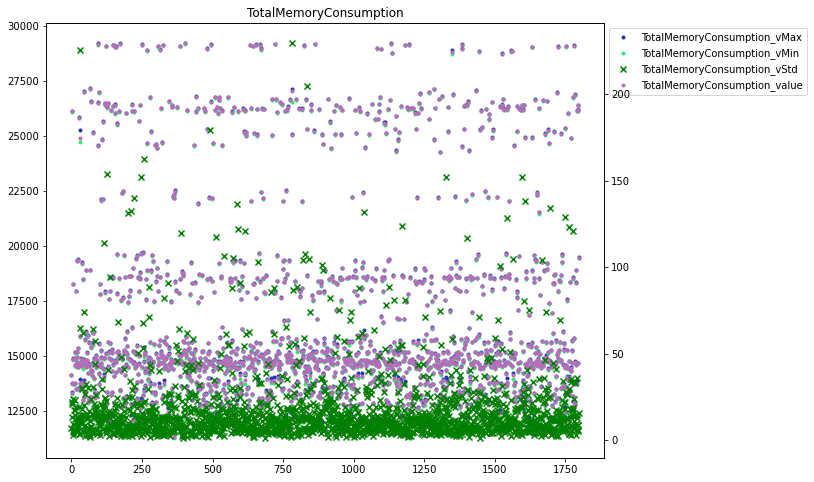

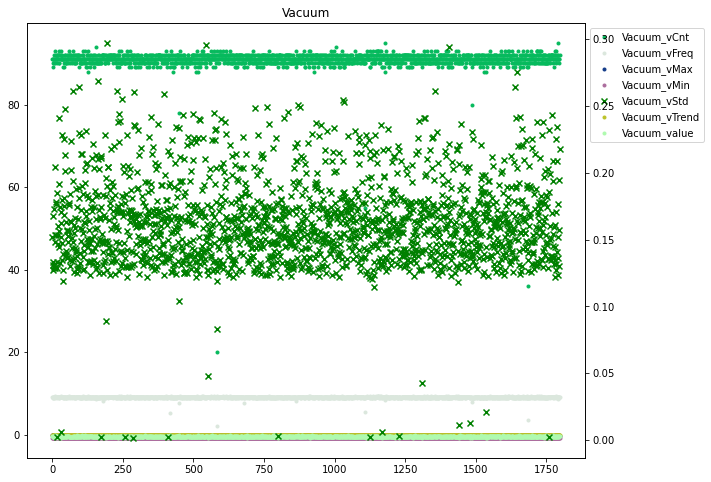

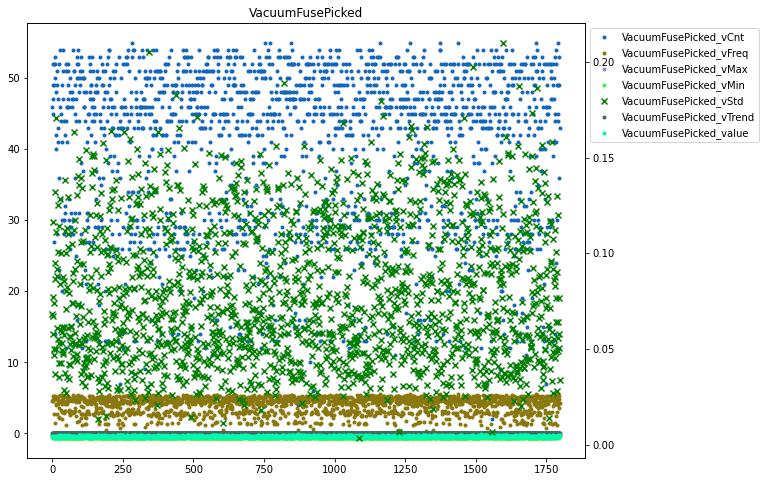

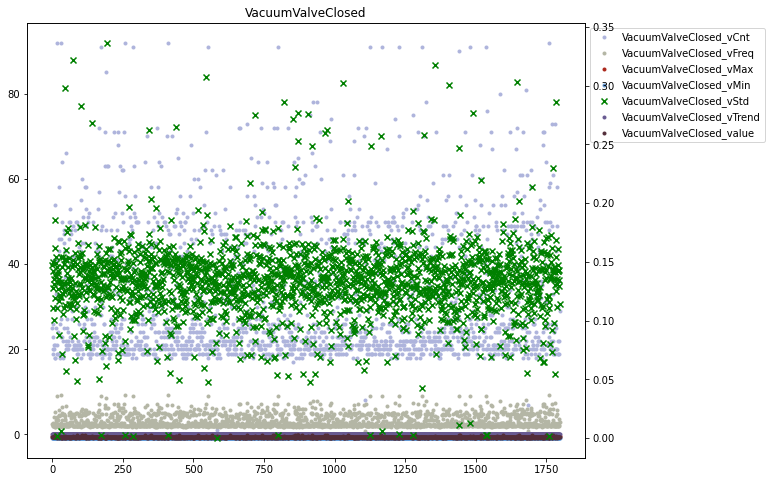

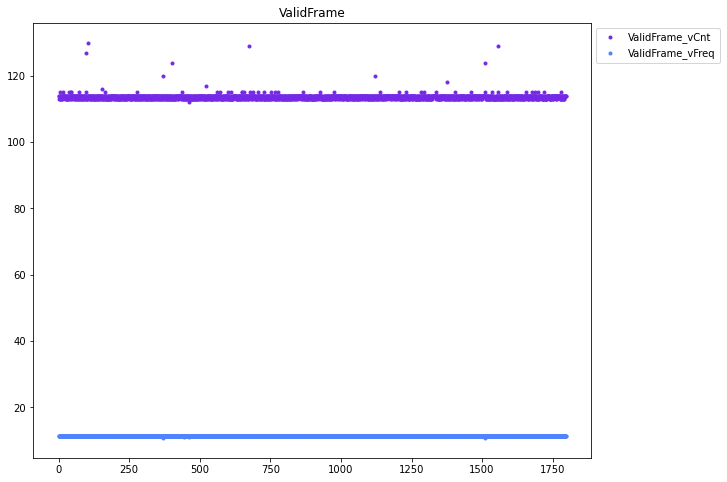

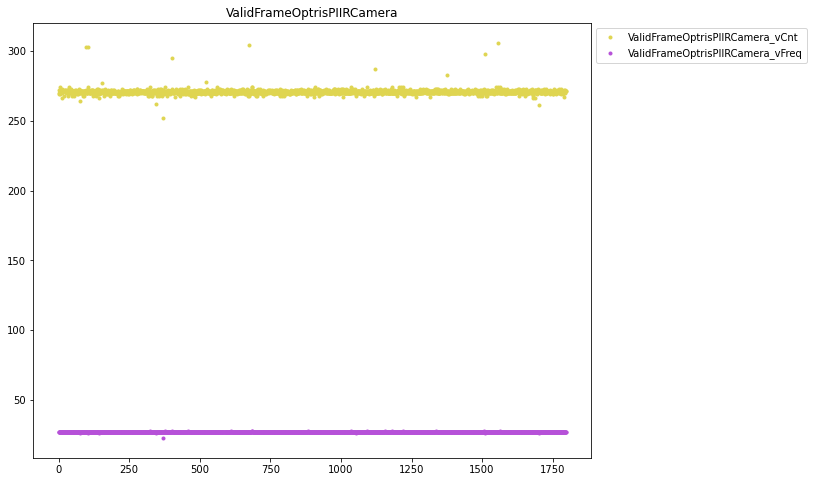

In [12]:
train_df_2 = train_df.sample(frac=0.1)
for f in feature_list:
    fig, ax1 = plt.subplots(figsize=(10,8))
    ax1.set_title(f)
    plts = []
    for _f in fields_dictv2[f]:
        axis_to_plot = ax1
        color = np.random.rand(3,)
        marker = '.'
        if _f.find('vStd') != -1:
#         if _f.find('vFreq') != -1:
            ax2 = ax1.twinx()
            axis_to_plot = ax2
            color = 'green'
            marker = 'x'
        l = axis_to_plot.scatter(range(train_df_2.shape[0]), train_df_2[_f], color=color, marker=marker, label=_f)
        plts.append(l)
    lbls = [l.get_label() for l in plts]
    ax1.legend(plts, lbls, bbox_to_anchor =(1.0, 1.0))
    

In [ ]:
train_df_2 = train_df.sample(frac=0.1)
# train_df_2 = train_df_2.filter(regex="vCnt|value") 
for f in feature_list:
    fields = fields_dictv2[f]
    fig = plt.figure(figsize=(10,8), dpi=75)
    sns.heatmap(train_df_2.filter(fields).corr(),annot=False)